<a href="https://colab.research.google.com/github/AriasgL/IT304S_UFSCAR/blob/main/IT304S_UFSCAR_Grupo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IT304S: Contratação de Energia para Grandes Consumidores.

Prof. Dr. Luiz Carlos Pereira da Silva

UFSCAR Grupo 3 Analise de Consumo

# Metodologia

Precisamos explicar a metodologia do analase do projeto.
CRISP_DM

# Business Understanding

Definimos nuestras etapas del proceso. 

# Data Understanding

In [ ]:
!git clone https://github.com/AriasgL/IT304S_UFSCAR.git

Cloning into 'IT304S_UFSCAR'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [ ]:
import pandas as pd

In [ ]:
abas_de_excel =  pd.ExcelFile("/content/IT304S_UFSCAR/Universidade.xlsx")
abas_de_excel.sheet_names

['Apresentação', 'UC1', 'UC2', 'UC3', 'UC4']

In [ ]:
UC1 = abas_de_excel.parse("UC1")
UC1.shape

(78, 30)

In [ ]:
UC2 = abas_de_excel.parse("UC2")
UC2.shape

(67, 31)

In [ ]:
UC3 = abas_de_excel.parse("UC3")
UC3.shape

(101, 30)

In [ ]:
UC1.head()

,DATA,ANO,MÊS,PERIODO,PIS/PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ISENTA_P,DEMANDA_ISENTA_FP,TAR_TUSD_KW_P,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,Valor da Fatura,Consumo Total,Acrescimo_Bamar,Acrescimo_Bverm1,Acrescimo_Bverm2
0,2014-06-01,2014,6,NaN,NaN,NaN,NaN,NaN,200,NaN,217,NaN,NaN,NaN,NaN,8036,53164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61200.0,NaN,NaN,NaN
1,2014-07-01,2014,7,NaN,NaN,NaN,NaN,NaN,200,NaN,243,NaN,NaN,NaN,NaN,"10206,00","70136,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80342.0,NaN,NaN,NaN
2,2014-08-01,2014,8,NaN,NaN,NaN,NaN,NaN,200,NaN,182,NaN,NaN,NaN,NaN,"5962,00","55654,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61616.0,NaN,NaN,NaN
3,2014-09-01,2014,9,NaN,NaN,NaN,NaN,NaN,200,NaN,146,NaN,NaN,NaN,NaN,"6638,00","36900,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43538.0,NaN,NaN,NaN
4,2014-10-01,2014,10,NaN,NaN,NaN,NaN,NaN,200,NaN,148,NaN,NaN,NaN,NaN,"5832,00","32340,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38172.0,NaN,NaN,NaN


In [ ]:
UC2.head()

,DATA,ANO,MÊS,PERIODO,PIS/PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ISENTA_P,DEMANDA_ISENTA_FP,TAR_TUSD_KW_P,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,Valor da Fatura,Consumo Total,Acrescimo_Bamar,Acrescimo_Bverm1,Acrescimo_Bverm2,Outros Lanc.
0,2020-06-01,2020.0,6.0,30.0,2059.86,8780.47,0.186,NaN,NaN,11545.0,7592.0,NaN,NaN,46.18,18.98,9247.261,42098.05,0.07831,0.07831,0.47353,0.31129,"4,427.63",NaN,NaN,NaN,53061.97,51345.311,NaN,NaN,NaN,-4156.26
1,2020-05-01,2020.0,5.0,31.0,3440.86,7940.49,0.186,NaN,NaN,11545.0,7592.0,NaN,NaN,46.18,18.98,8298.050,37490.44,0.07831,0.07831,0.47353,0.31129,"3,762.81",NaN,NaN,NaN,50601.84,45788.490,NaN,NaN,NaN,-4015.27
2,2020-04-01,2020.0,4.0,30.0,2929.20,7119.23,0.186,NaN,NaN,11545.0,7592.0,NaN,NaN,46.18,18.98,7844.711,30914.01,0.07831,0.07831,0.47353,0.31129,"4,063.79",NaN,NaN,NaN,46572.95,38758.721,NaN,NaN,NaN,-3756.96
3,2020-03-01,2020.0,3.0,31.0,3168.37,9117.57,0.186,NaN,NaN,11545.0,7592.0,NaN,NaN,46.18,18.98,10159.980,39385.02,0.07831,0.07831,0.47353,0.31129,"3,241.22",NaN,NaN,NaN,52320.50,49545.000,NaN,NaN,NaN,-4156.35
4,2020-02-01,2020.0,2.0,29.0,2569.14,7801.96,0.186,NaN,NaN,11545.0,7592.0,NaN,NaN,46.18,18.98,8761.990,38622.47,0.07831,0.07831,0.47353,0.31129,"2,340.26",NaN,NaN,NaN,49165.02,47384.460,NaN,NaN,NaN,-3699.76


In [ ]:
UC3.head()

,DATA,ANO,MÊS,PERIODO,PIS/PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ISENTA_P,DEMANDA_ISENTA_FP,TAR_TUSD_KW_P,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,Valor da Fatura,Consumo Total,Acrescimo_Bamar,Acrescimo_Bverm1,Acrescimo_Bverm2
0,2016-07-06,2016.0,7.0,44.0,10.94,50.61,0.18,NaN,139,35.972222,139.0,35.972222,NaN,NaN,10.830000,142.56,1778.40,0.857323,0.082366,0.414212,0.261527,NaN,NaN,NaN,NaN,"R$1.338,96",1920.96,NaN,NaN,NaN
1,2016-08-05,2016.0,8.0,30.0,15.71,72.38,0.18,NaN,139,37.916667,139.0,37.916667,NaN,NaN,10.830000,181.21,2199.24,0.857323,0.082366,0.414212,0.261527,NaN,NaN,NaN,NaN,"R$1.591,88",2380.45,NaN,NaN,NaN
2,2016-09-06,2016.0,9.0,32.0,18.86,87.30,0.18,NaN,139,45.069444,139.0,45.069444,NaN,NaN,11.019063,215.42,2760.12,0.864822,0.072098,0.387754,0.249605,NaN,NaN,NaN,NaN,"R$1.703,84",2975.54,NaN,NaN,NaN
3,2016-10-06,2016.0,10.0,30.0,26.09,120.59,0.18,NaN,139,27.638889,139.0,27.638889,NaN,NaN,11.380000,140.07,2210.31,0.879060,0.052486,0.337260,0.226837,NaN,NaN,NaN,NaN,"R$2.815,35",2350.38,NaN,NaN,NaN
4,2016-11-07,2016.0,11.0,32.0,17.13,79.53,0.18,NaN,139,30.694444,139.0,30.694444,NaN,NaN,11.380000,144.13,2313.63,0.879068,0.052489,0.337265,0.879068,NaN,NaN,NaN,NaN,"R$2.807,48",2457.76,NaN,NaN,NaN


# Data Preparation

In [ ]:
import numpy as np

In [ ]:
np.nan + np.nan

nan

In [ ]:
np.nan == np.nan

False

In [ ]:
np.isnan(np.nan)

True

In [ ]:
data = []
for colm in UC1.columns[3:10]:
  data.append([colm, UC1.shape[0]-UC1[colm].apply(np.isnan).sum(), UC1[colm].apply(np.isnan).sum(), (UC1[colm].apply(np.isnan).sum()/78)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

,Variavel,Quantidade de dados Disponíveis,Quantidade de dados Faltantes,Percentagem de Dados Faltantes
0,DEMANDA_CONTRATADA_P,0,78,100.00%
1,DEMANDA_REGISTRADA_P,0,78,100.00%
2,PERIODO,23,55,70.51%
3,PIS/PASEP,23,55,70.51%
4,COFINS,23,55,70.51%
5,ICMS,23,55,70.51%


In [ ]:
data = []
for colm in UC2.columns[3:10]:
  data.append([colm, UC2.shape[0]-UC2[colm].apply(np.isnan).sum(), UC2[colm].apply(np.isnan).sum(), (UC2[colm].apply(np.isnan).sum()/67)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

,Variavel,Quantidade de dados Disponíveis,Quantidade de dados Faltantes,Percentagem de Dados Faltantes
0,DEMANDA_CONTRATADA_P,0,67,100.00%
1,DEMANDA_CONTRATADA_FP,0,67,100.00%
2,PERIODO,66,1,1.49%
3,PIS/PASEP,66,1,1.49%
4,COFINS,66,1,1.49%
5,ICMS,66,1,1.49%
6,DEMANDA_REGISTRADA_P,66,1,1.49%


In [ ]:
data = []
for colm in UC3.columns[3:]:
  data.append([colm, UC3.shape[0]-UC31[colm].apply(np.isnan).sum(), UC3[colm].apply(np.isnan).sum(), (UC3[colm].apply(np.isnan).sum()/69)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

NameError: ignored

# Dados Faltantes


In [ ]:
import missingno as msno

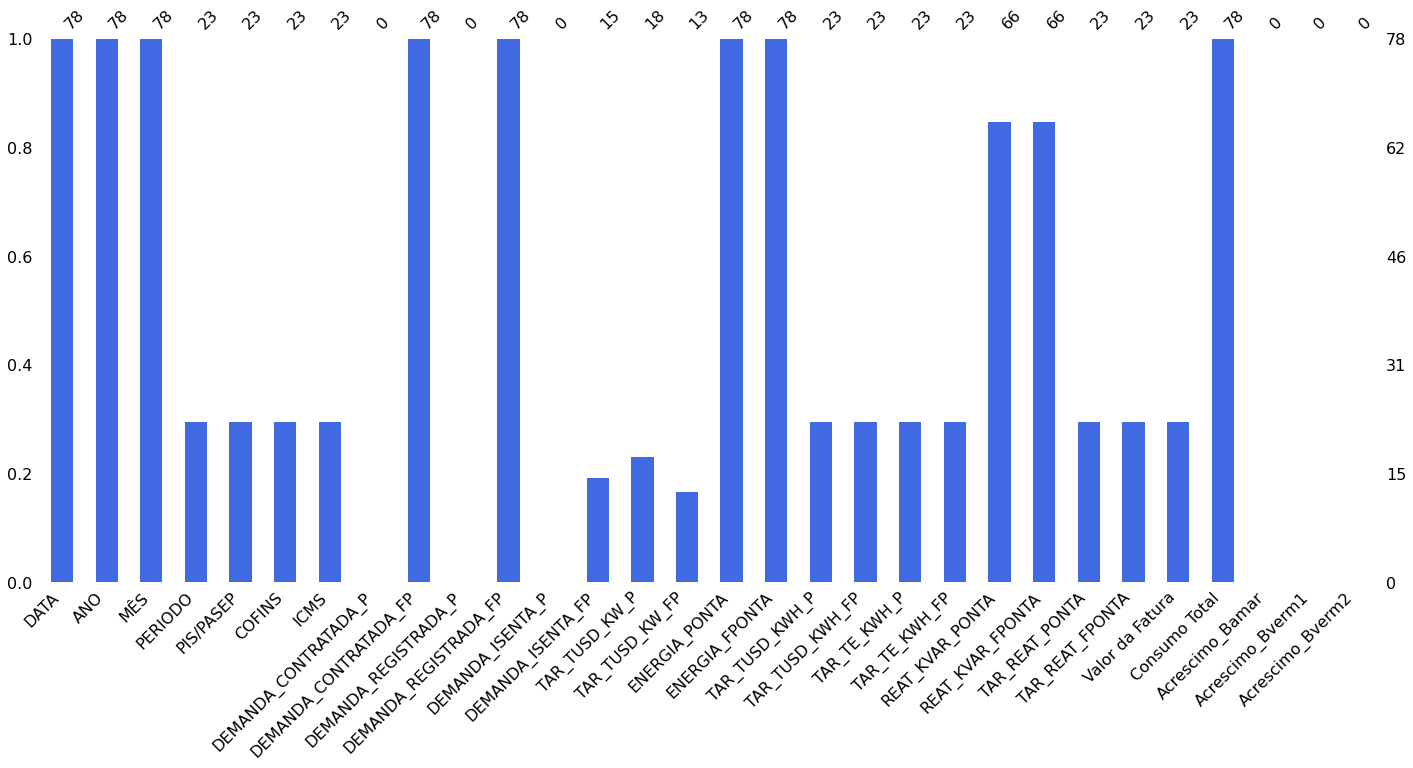

In [ ]:
msno.bar(UC1, color="RoyalBlue") #para visualizar a integridade do datafram

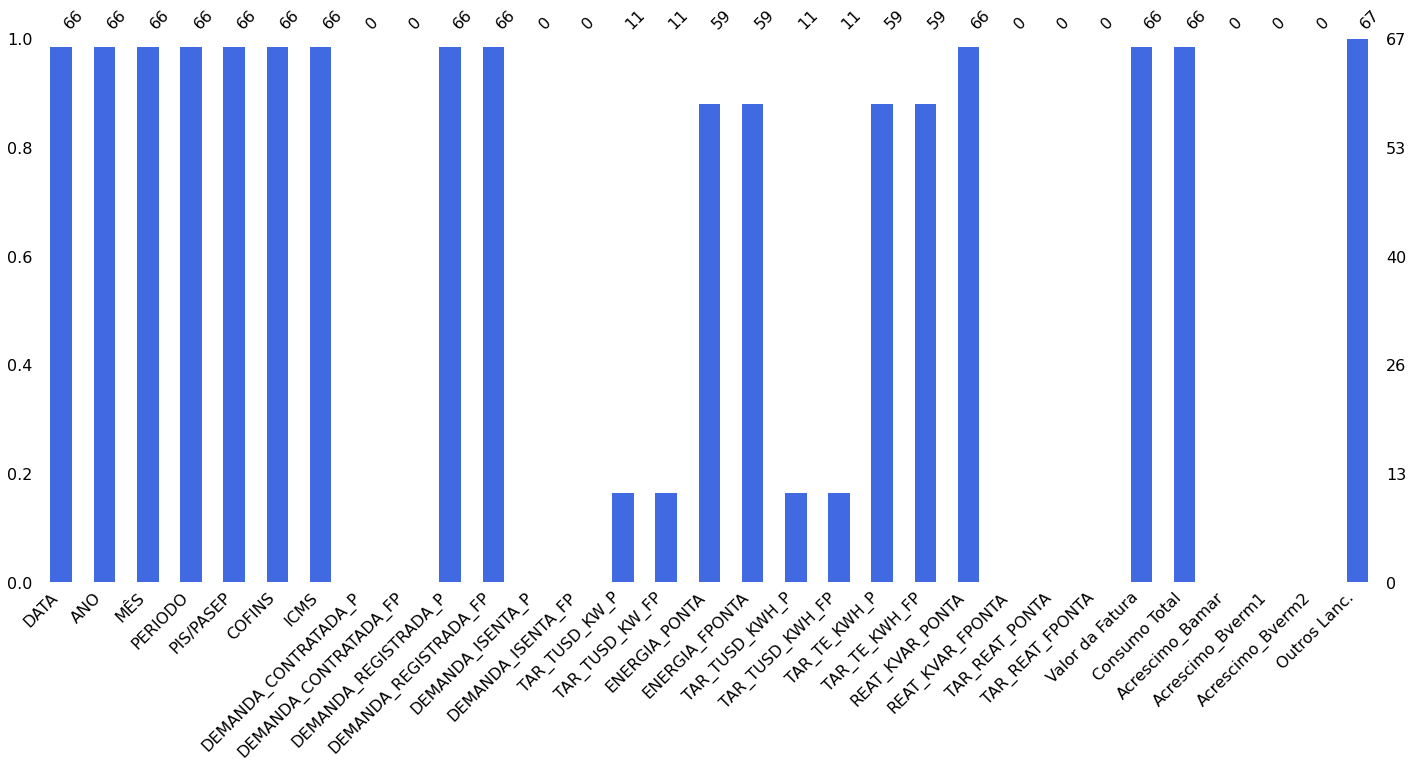

In [ ]:
msno.bar(UC2, color="RoyalBlue") #para visualizar a integridade do datafram

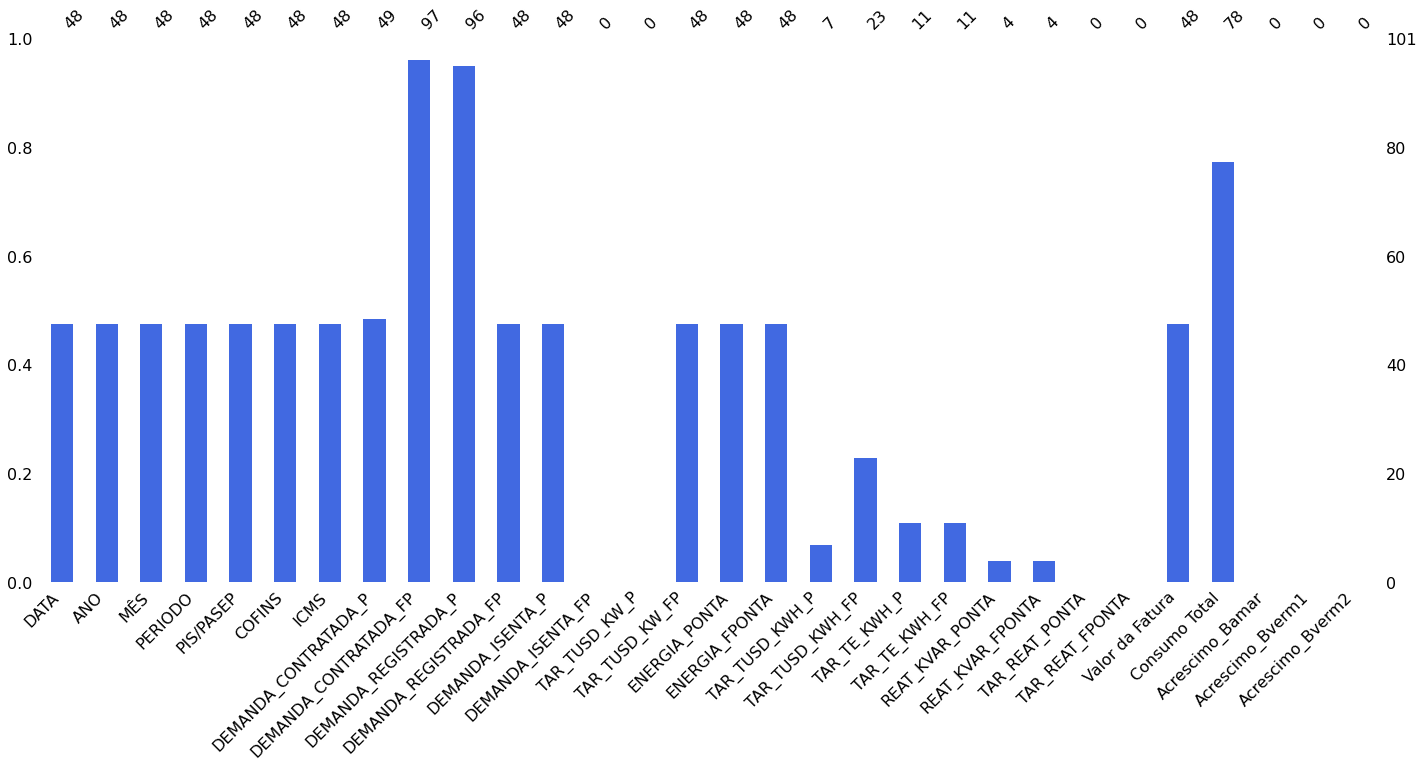

In [ ]:
msno.bar(UC3, color="RoyalBlue") #para visualizar a integridade do datafram

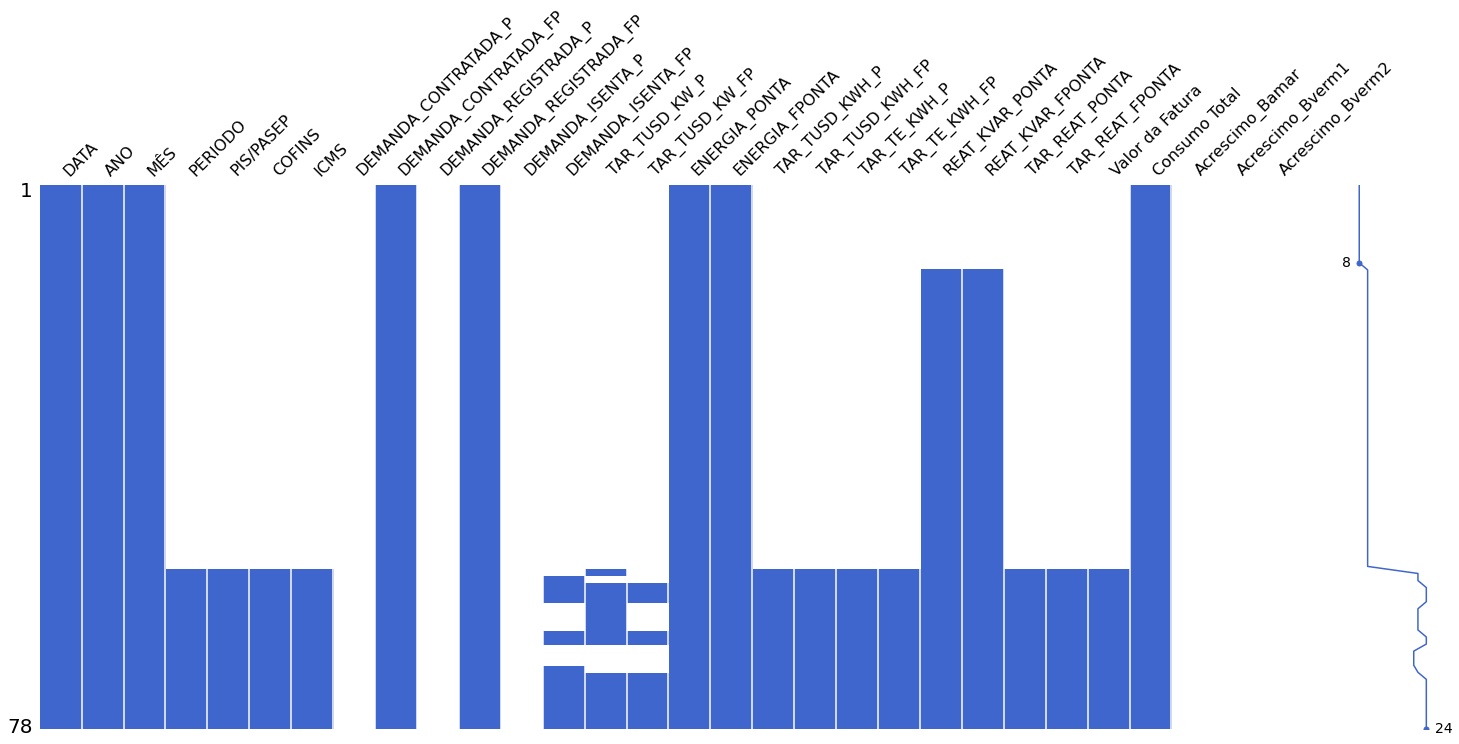

In [ ]:
msno.matrix(UC1, color = (0.25,0.4,0.8))

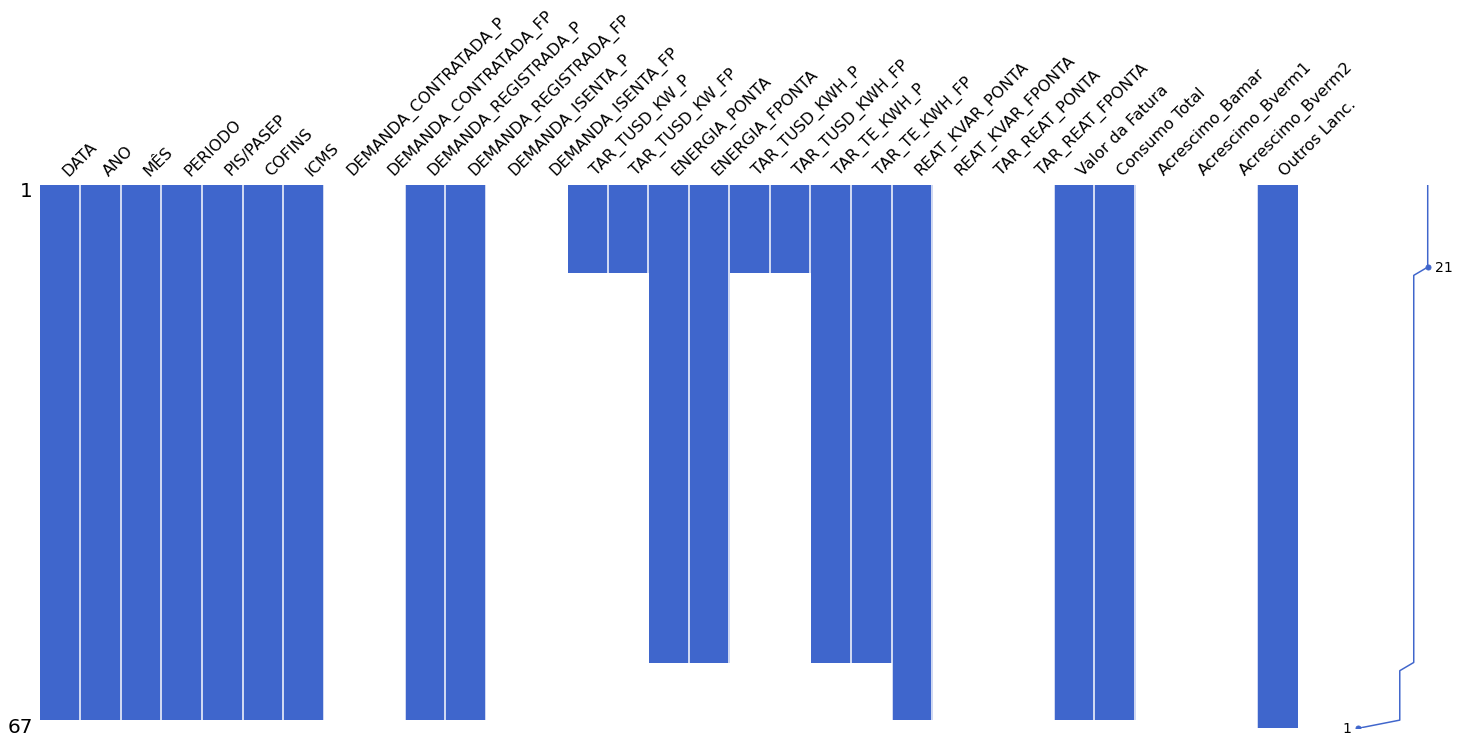

In [ ]:
msno.matrix(UC2, color = (0.25,0.4,0.8))

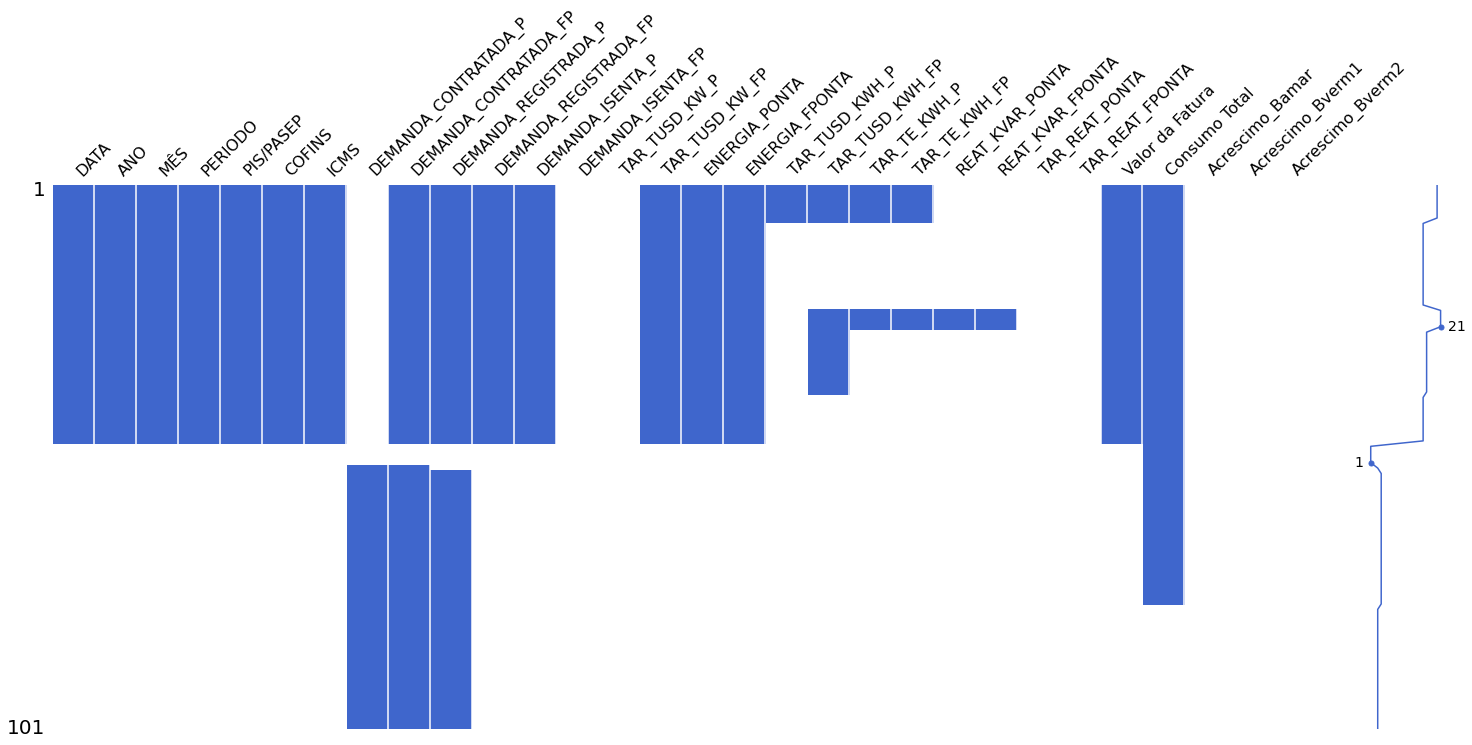

In [ ]:
msno.matrix(UC3, color = (0.25,0.4,0.8))

Matriz de Correlacion. 

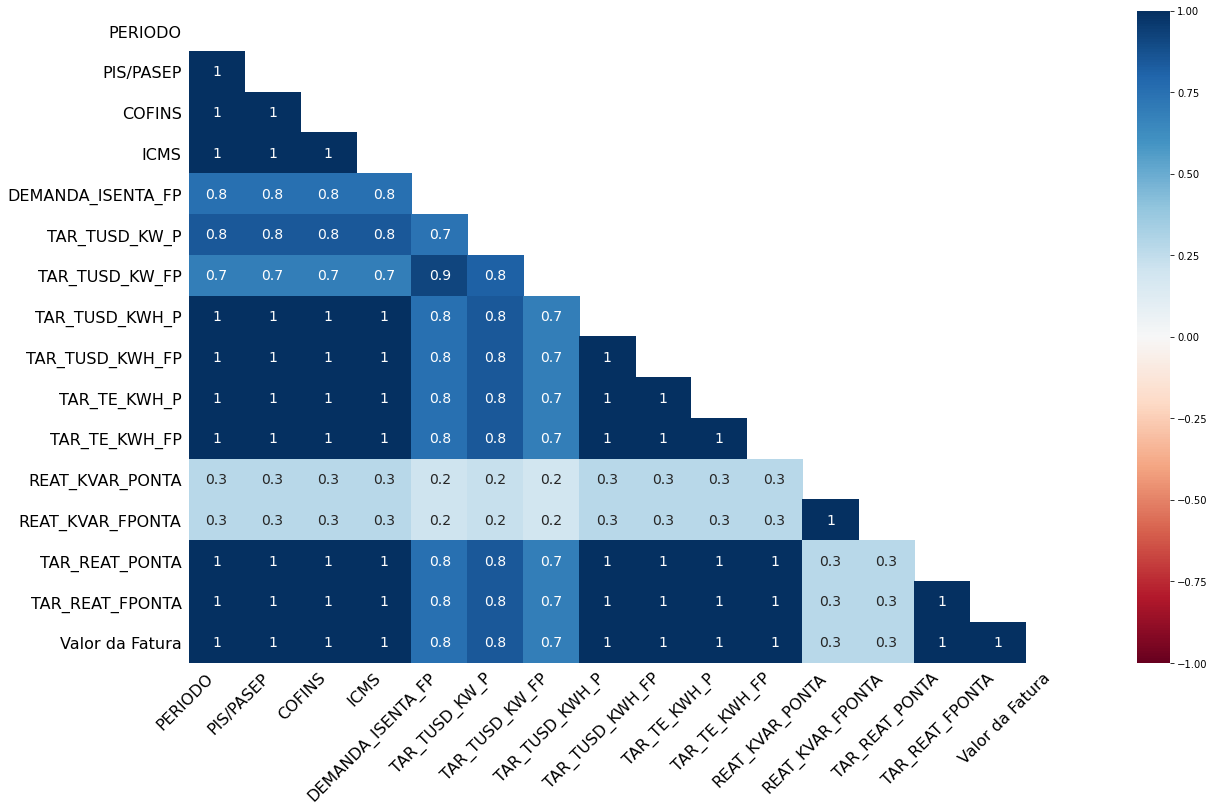

In [ ]:
msno.heatmap(UC1)

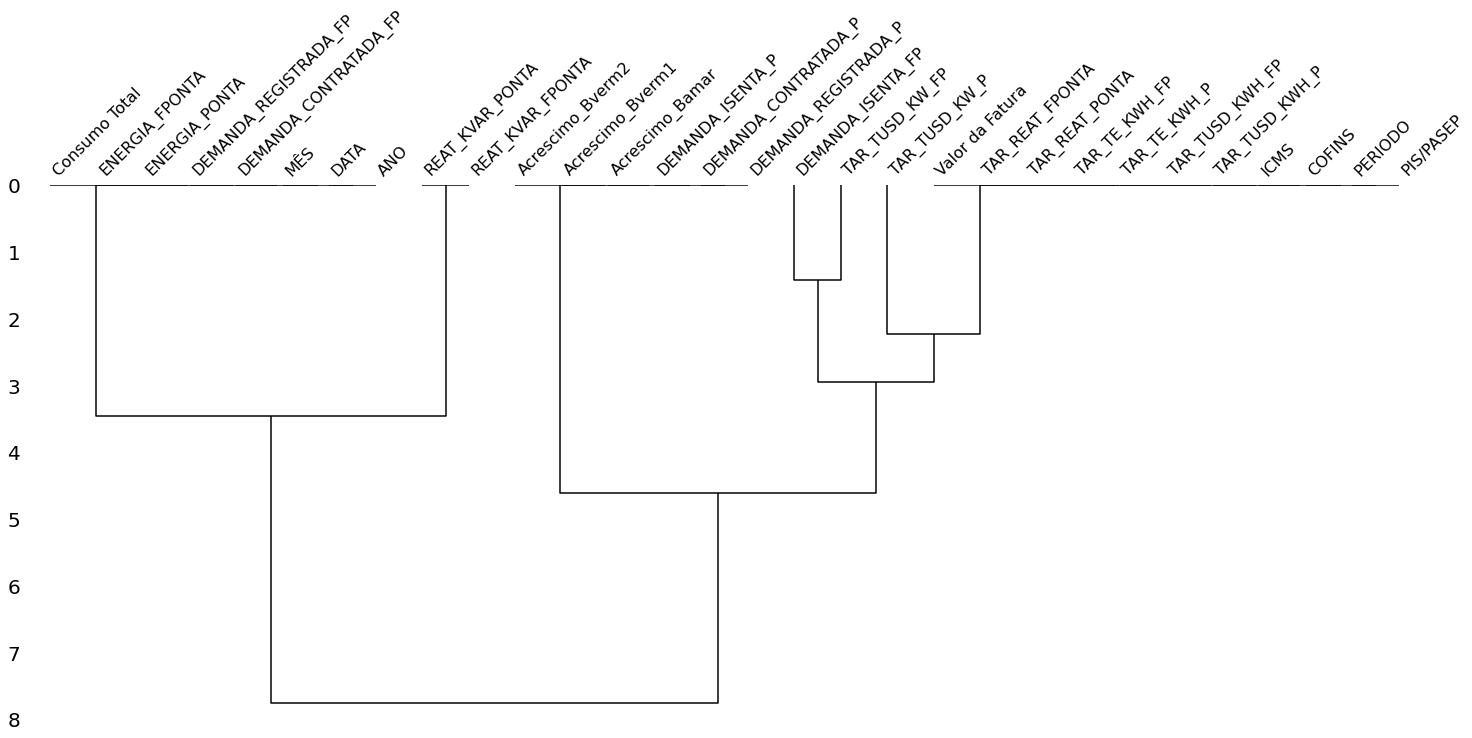

In [ ]:
msno.dendrogram(UC1)

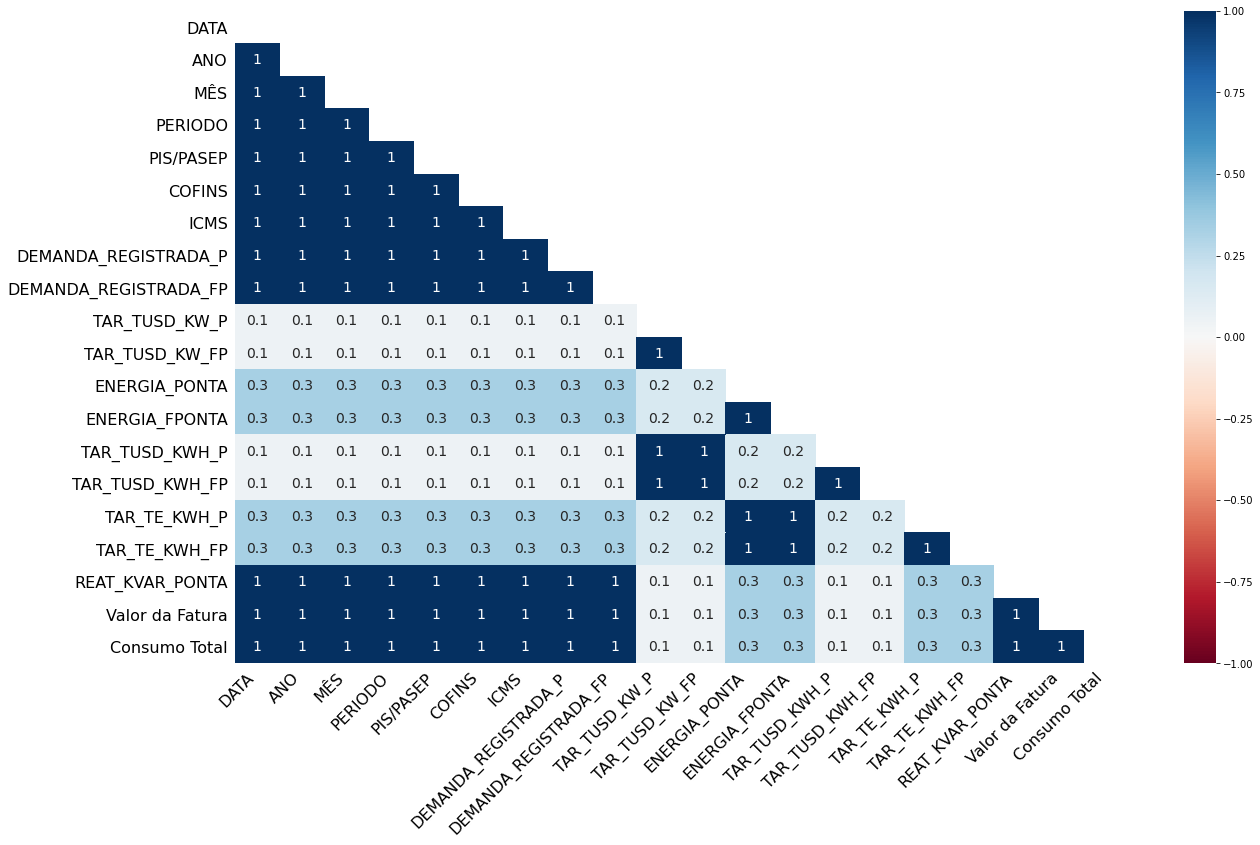

In [ ]:
msno.heatmap(UC2)

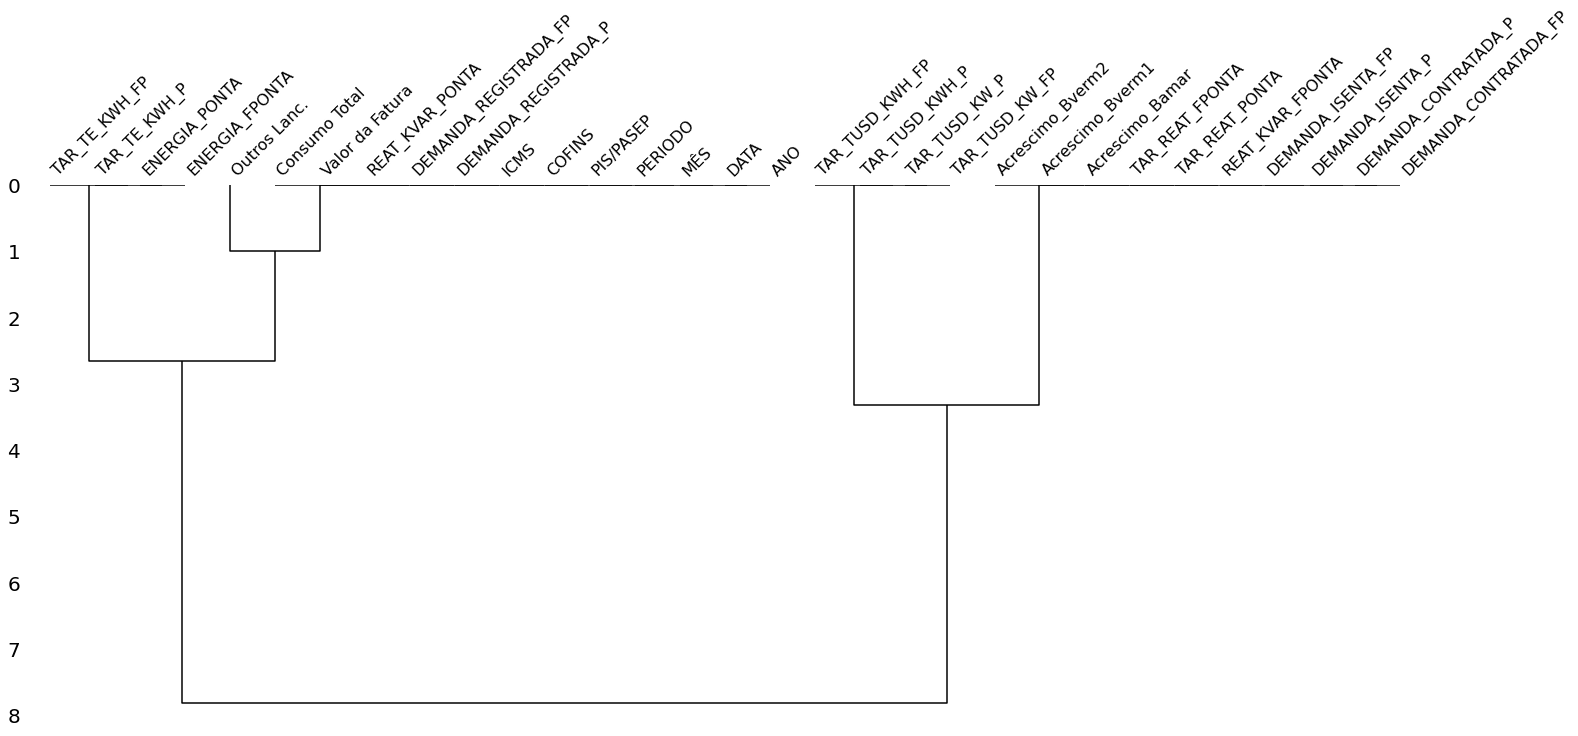

In [ ]:
msno.dendrogram(UC2)

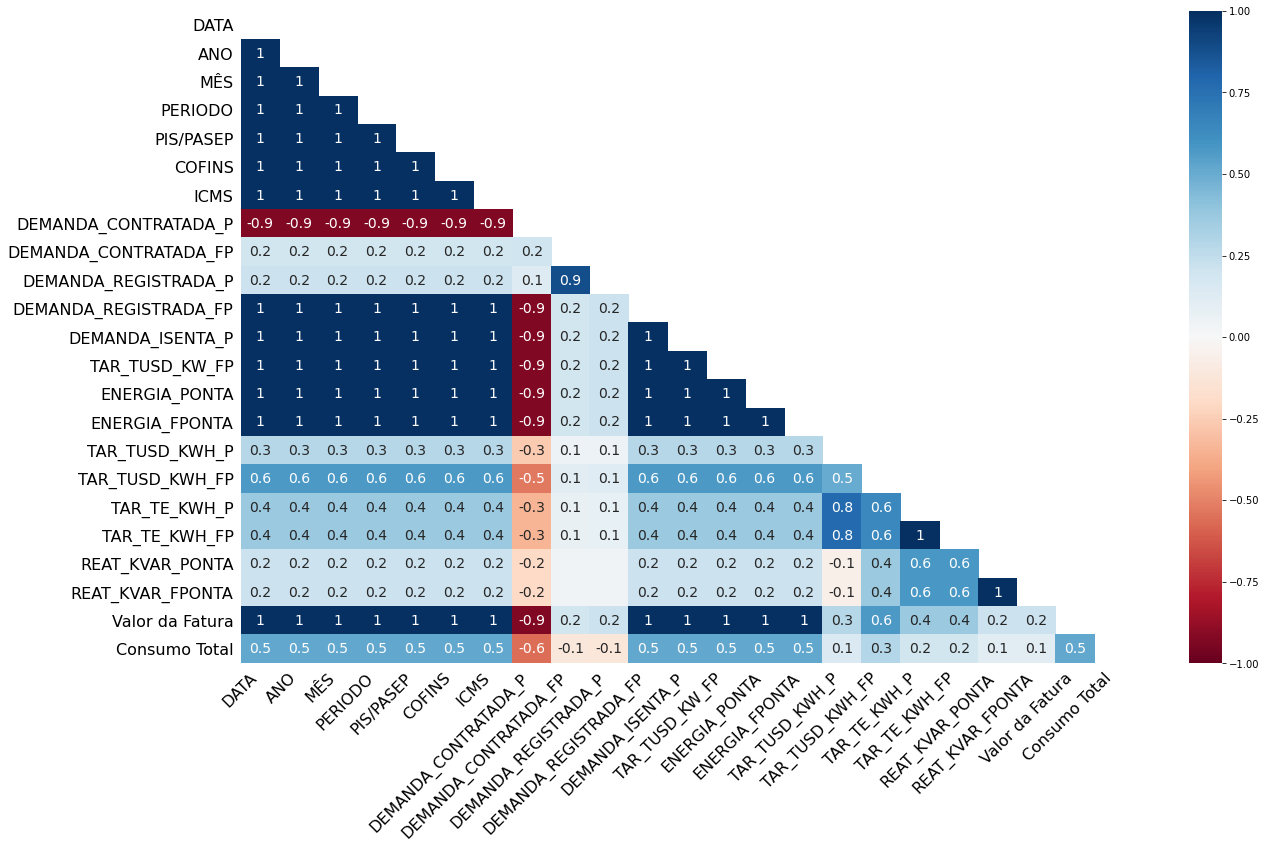

In [ ]:
msno.heatmap(UC3)

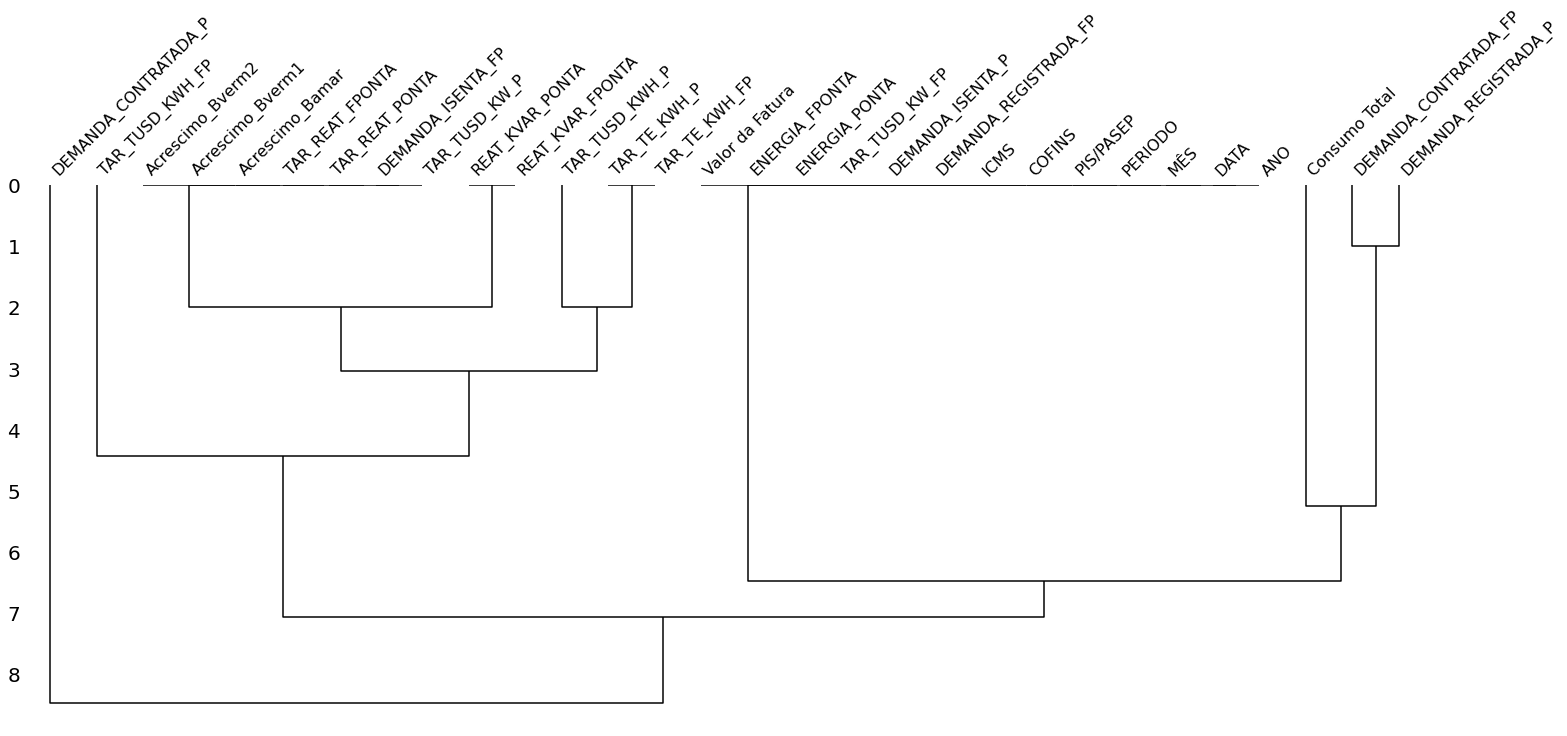

In [ ]:
msno.dendrogram(UC3)

Limpeça de Dados Faltantes

In [ ]:
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.8]), 1)
UC1_df.shape

(78, 22)

In [ ]:
UC2_df = UC2.drop(set(UC2.columns[UC2.isnull().mean() >0.8]), 1)
UC2_df.shape

(67, 17)

In [ ]:
UC3_df = UC3.drop(set(UC3.columns[UC3.isnull().mean() >0.8]), 1)
UC3_df.shape

(101, 18)

# Graficos das Variaveis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ValueError: ignored

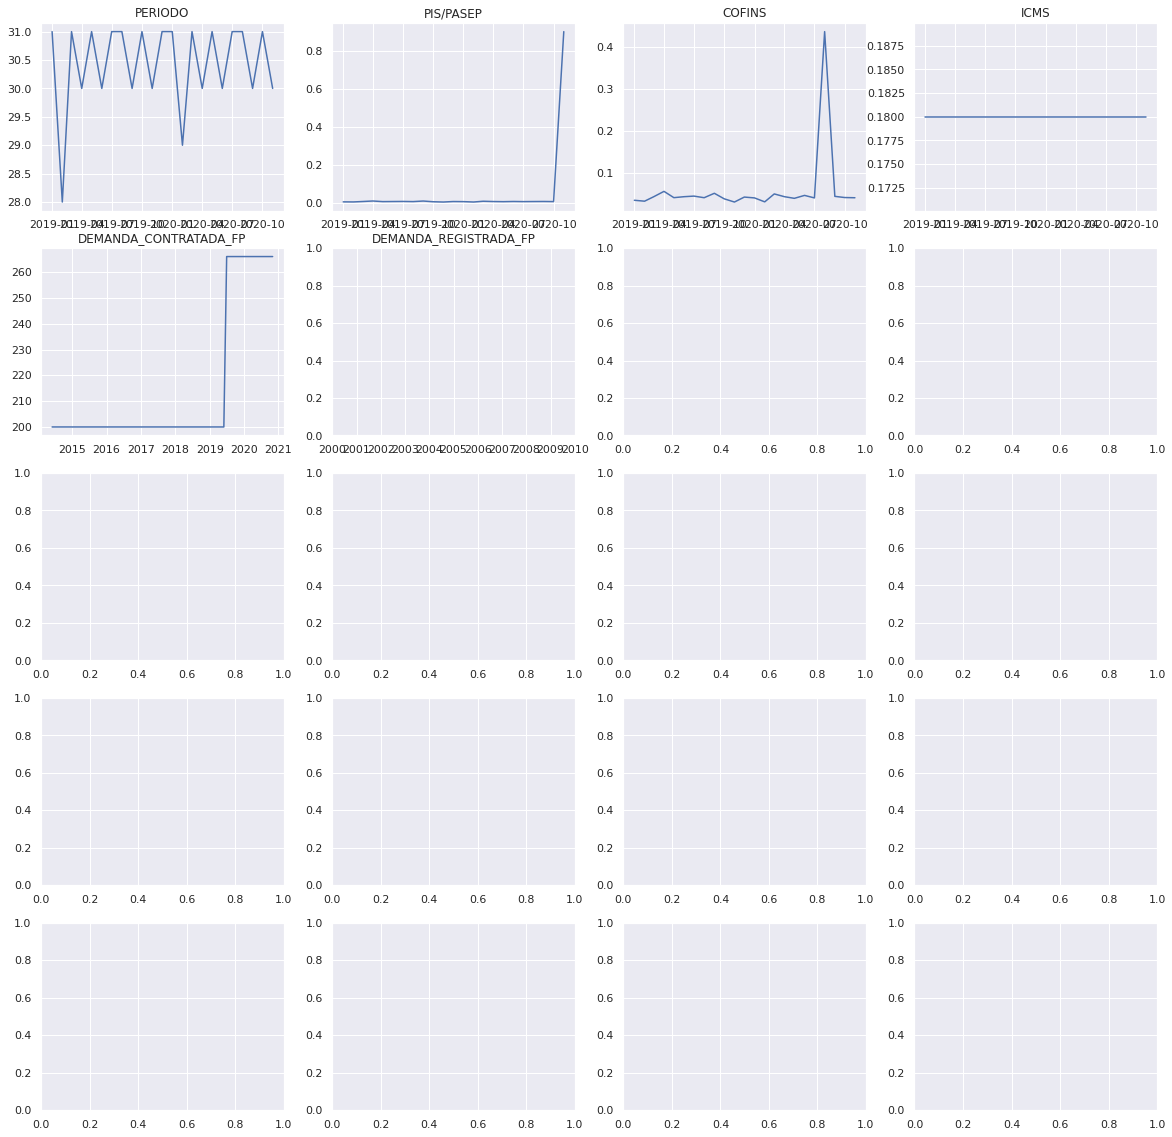

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_df.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_df.DATA, UC1_df[col])

TypeError: ignored

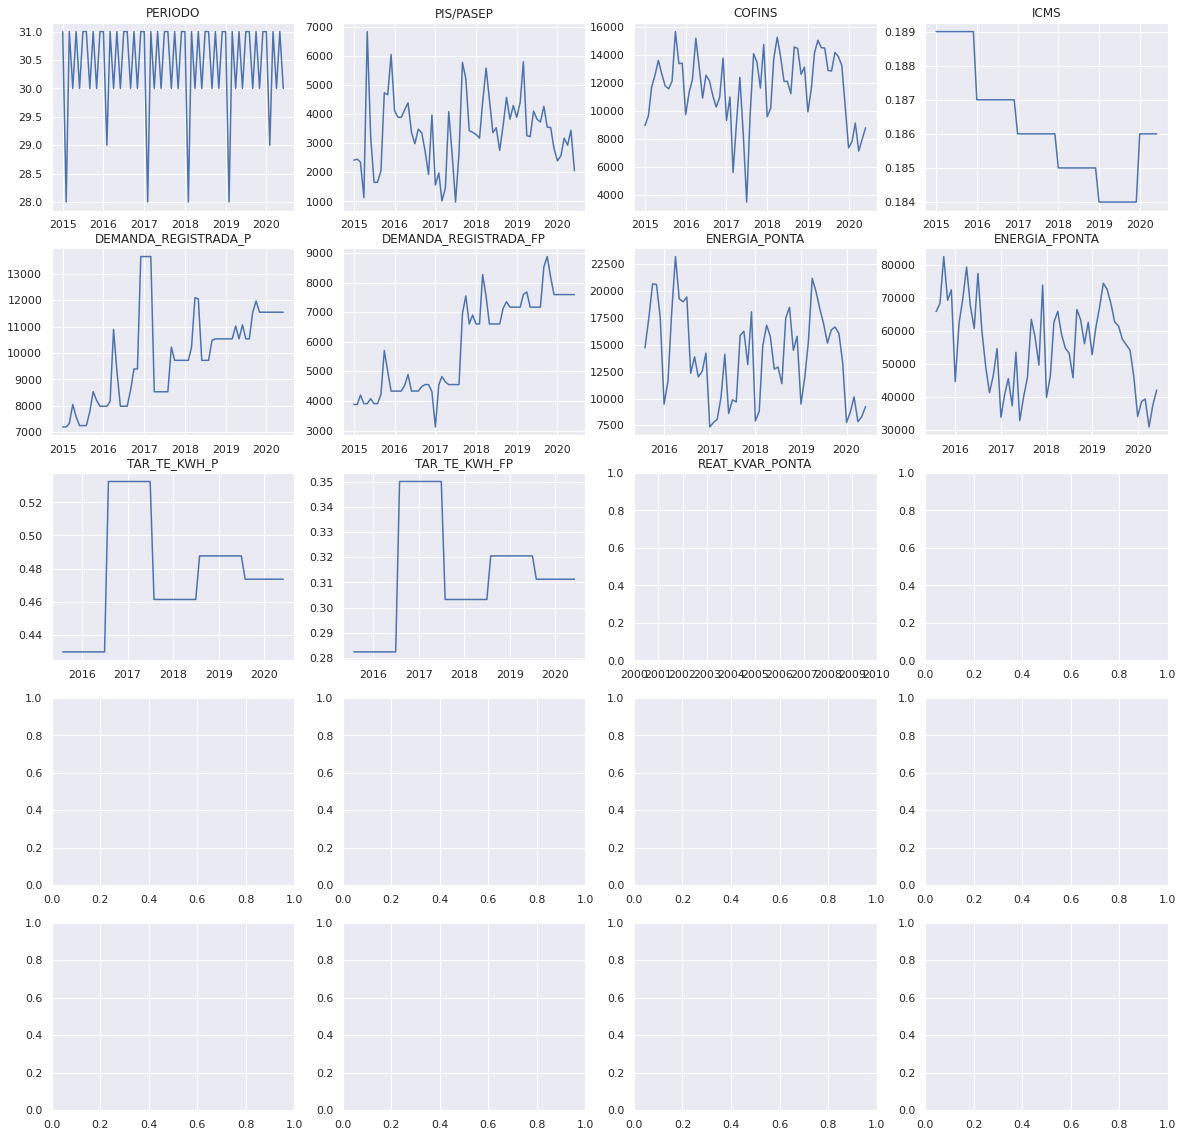

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC2_df.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC2_df.DATA, UC2_df[col])

ValueError: ignored

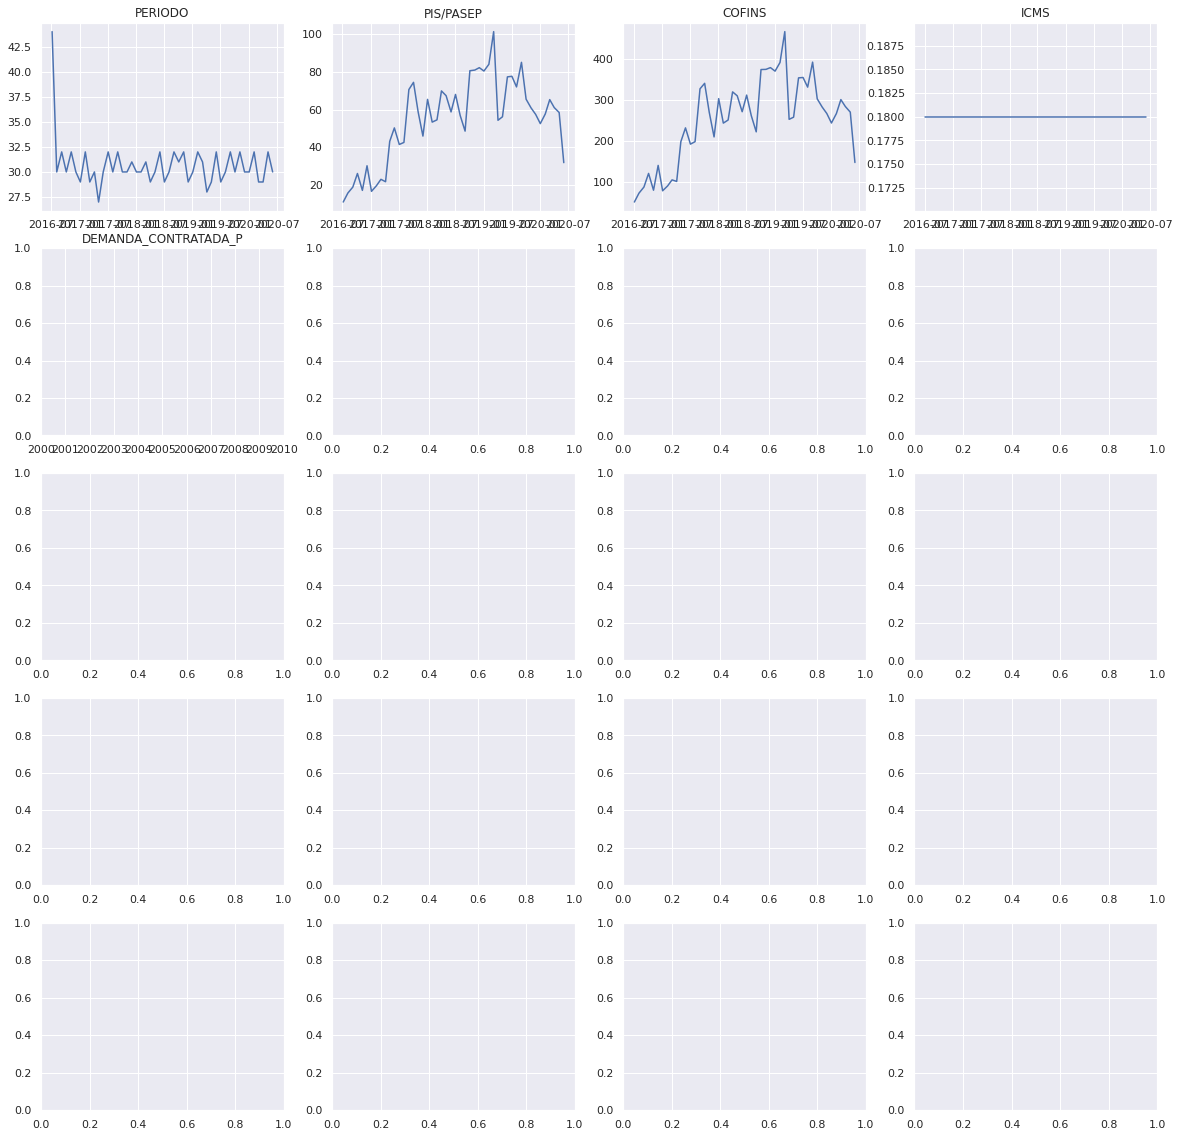

In [ ]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC3_df.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC3_df.DATA, UC3_df[col])